### 이상치
- 이상치, 극단치( outlier 
- ex) 몸무게 300kg, 통상적인 범위에서는 현실 불가능한 수치
- 1. 논리적으로 판단해서 정하는 법
- 2. 통계적인 기준을 이용해서 정하는 법

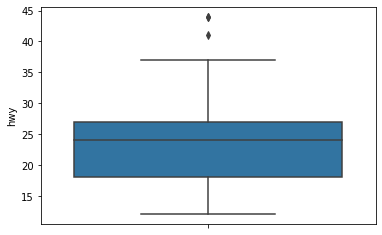

In [4]:
import pandas as pd
import seaborn as sns

mpg = pd.read_csv('mpg.csv')

sns.boxplot(data=mpg, y='hwy' )

- 양쪽 긴 변, 극단치 경계
- 아랫수염
- 윗수염

- 네모상자
> IQR
- 아래기준 변은 1사분위수(Q1)
- 중간 선은 2사분위수(Q2)
- 맨 위에 선은 3사분위수(Q3)

> 극단치는?
- 극단치 경계를 넘어가는 점들을 극단치, 이상치라 한다.

- 아랫수염 : 하위 0~25% 내에 해당하는 값
- Q1 하위 25% 위치 값
- Q2 하위 50% 중앙값
- Q3 하위 75%값
- 윗수염 75~100%내에 해당하는 값
- 극단치 경계 Q1, Q3 밖 1.5IQR 내 최대값
- 극단치 : Q1, Q3 밖 1.5IQR 벗어난 값


- df.quantile() 분위수를 구할 수 있음, 25%, 75%, 50% 내용을 구할 수 있음

In [8]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [5]:
#1사분위수, 3사분위수 구하기

pct25 = mpg['hwy'].quantile(.25)

In [9]:
pct75 = mpg['hwy'].quantile(.75)

- IQR 1사분위수, 3사분위수의 거리의 차를 IQR

In [11]:
iqr = pct75- pct25

In [12]:
iqr

9.0

In [ ]:
#하한, 상한 구하기
# 극단치의 경계 
# 하한: 1사분위수보다 'IQR의 1.5배만큼 더 작은 값'
# 상한: 3사분위수보다 'IQR의 1.5배만큼 더 큰 값'

In [16]:
pct25 - 1.5 * iqr

4.5

In [17]:
pct75 + 1.5 * iqr

40.5

In [19]:
import numpy as np

In [20]:
#극단치, 이상치를 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5)| (mpg['hwy']>40.5), np.nan, mpg['hwy'])

In [23]:
mpg['hwy'].isna().sum() # 결측치가 3개가 나옴!

3

In [24]:
#결측치를 제거하고 분석하게 되면
mpg.dropna(subset=['hwy']).groupby('drv').agg(mean_hwy=('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


## 판다스에 대해서 들어가기!

In [27]:
df = pd.read_csv('gapminder.tsv',sep='\t')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [30]:
df.shape #컬럼에 행과 열을 확인

(1704, 6)

In [31]:
#컬럼만 추출
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [32]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

### 데이터를 추출하기!
- 열 단위 추출

In [39]:
df[['continent','gdpPercap']]

,continent,gdpPercap
0,Asia,779.445314
1,Asia,820.853030
2,Asia,853.100710
3,Asia,836.197138
4,Asia,739.981106
...,...,...
1699,Africa,706.157306
1700,Africa,693.420786
1701,Africa,792.449960
1702,Africa,672.038623


### loc, iloc
- loc 인덱스 기준 행 데이터 추출
- iloc 행 번호 기준으로 데이터 추출

In [40]:
a=[1,2,3,4]

In [43]:
a[2]

3

In [46]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [47]:
df.loc[1702] #인데스 기준으로 값을 추출!

country      Zimbabwe
continent      Africa
year             2002
lifeExp        39.989
pop          11926563
gdpPercap     672.039
Name: 1702, dtype: object

In [48]:
#인덱스 접근 변수에 대해 값을 할당하고 찾을 수 있다.
df_rows = df.shape[0]

In [57]:
df_rows_new =df_rows -50

In [58]:
df_rows_new

1654

In [59]:
df.loc[df_rows_new] #변수에 할당한 인덱스를 추출 할 수 있다.

country       Vietnam
continent        Asia
year             2002
lifeExp        73.017
pop          80908147
gdpPercap     1764.46
Name: 1654, dtype: object

In [65]:
#다양한 인덱스를 추출 가능
df_new = df.loc[[0,1,23,1234]]

- iloc
- 행 번호 기준 데이터 추출!

In [66]:
df_new

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
23,Albania,Europe,2007,76.423,3600523,5937.029526
1234,Poland,Europe,2002,74.670,38625976,12002.239080


- 슬라이싱 구문으로 데이터 추출

In [85]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [92]:
df.loc[0:23,['year','pop','lifeExp']] #앞은 행, 뒤는 열 

,year,pop,lifeExp
0,1952,8425333,28.801
1,1957,9240934,30.332
2,1962,10267083,31.997
3,1967,11537966,34.020
4,1972,13079460,36.088
5,1977,14880372,38.438
6,1982,12881816,39.854
7,1987,13867957,40.822
8,1992,16317921,41.674
9,1997,22227415,41.763


In [93]:
df.iloc[0:23,[0,2,3,4]] #loc, iloc 받아들이는 방법이 다르다!

,country,year,lifeExp,pop
0,Afghanistan,1952,28.801,8425333
1,Afghanistan,1957,30.332,9240934
2,Afghanistan,1962,31.997,10267083
3,Afghanistan,1967,34.020,11537966
4,Afghanistan,1972,36.088,13079460
5,Afghanistan,1977,38.438,14880372
6,Afghanistan,1982,39.854,12881816
7,Afghanistan,1987,40.822,13867957
8,Afghanistan,1992,41.674,16317921
9,Afghanistan,1997,41.763,22227415


- Range 값을 넣어서 인덱스를 iloc 할 수 있다!

In [94]:
a_range = list(range(5))

In [95]:
a_range

[0, 1, 2, 3, 4]

In [99]:
df.iloc[:, b_range] #숫자 리스트값이 적용 된다. iloc안으로!

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [97]:
b_range = list(range(0,6,2))

In [98]:
b_range

[0, 2, 4]

## 과제
- mpg데이터를 loc, iloc을 기준으로 추출하기
- 변수에 값을 할당해서 lioc 추출하기!(변수(컬럼) 짝수만, 홀수만)